<div style="width: 100%; max-width: 100%; background-color: #f0f0f0; border: 2px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h2 style="color: #18453B; text-align: center;">Homework: Imputation</h2>
  
  <p style="color: #34495e; line-height: 1.6;">
    This HW is lighter than others to allow you to complete your project.  Only 30 points total. 
  </p>
  
  <!-- <div style="background-color: #6FC276; color: white; padding: 10px; margin-top: 20px; text-align: center; border-radius: 5px;">
    <strong>Tip:</strong> Plan carefully!
  </div> -->
</div>

<div style="width: 100%; max-width: 100%; background-color: #fefefe; border: 1px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h3 style="color: #18453B; text-align: center;">Problem 1: Test of MCAR Missingness</h3>
  
  <p style="color: #34495e; line-height: 1.6;">
    A crucial first step before imputation is testing for the quality/mechanism of missingness. We typically start with a test for MCAR since that might be the easiest to repair, perhaps using a deletion method. Although we have mentioned this many times in the lecture, we have not actually discussed how to do it. 
    The plan for this HW problem is for you to learn and implement highly simplifed versions of two methods: the Expectation-Maximization (EM) and Little's MCAR Test methods. In the the real-world you would use libraries (https://pypi.org/project/missingpy/) for these, and not use a simplified approach, but then you would also not know what you are doing. This HW shows you what these methods are doing so that you can intelligently use full libraries. 
  </p>
  
  <ul style="color: #34495e; line-height: 1.6;">
    <li>Write Python code that reads the iris dataset.</li>
    <li>Make a heatmap of the correlation marix of the four numeric input features; this is the ground truth.</li>
    <li>Pick a column (e.g., `sepal width`) and randomly replace the values with `NaN`.</li>
    <li>Make a new heatmap and compare it with the original.</li>
    <li>Find the mean and variance of the (remaining) values in that column.</li>
    <li>Sample a normal distribution function with that mean and variance and create a new, fixed data matrix. This is the first step in the EM method: in a full implementation you would itereate new versions until convergence. 
    <li>Make yet a new heatmap. Note that you imputed in the previous (simplified) EM step completely at random: you literally used a random number generator with no bias. 
    <li>Compare the imputed-data heatmap to the heatmap from the data with missing values. Did the imputation, done completely at random,  change the correlation structure? This is the essence of Little's MCAR Test: the missing values are assumed to be MCAR, so you fill them accordingly and then see if that assumption is reasonable. (The Little Test is normally cast as a hypothesis test with a p value.) 
    <li>Once your have a working code, play with various choices and write down what you see. That is, change the column, change the percentage missing, etc. 
    <li>In a markdown cell, summarize what you learned and what advice you would give to your future self when you are working on data science projects. 
  </ul>

  I will give you some helper code to start with! If you use it, add detailed comments.
  
  <!-- <div style="background-color: #6FC276; color: white; padding: 10px; margin-top: 20px; text-align: center; border-radius: 5px;">
    <strong>Tip:</strong> Plan carefully!
  </div> -->
</div>

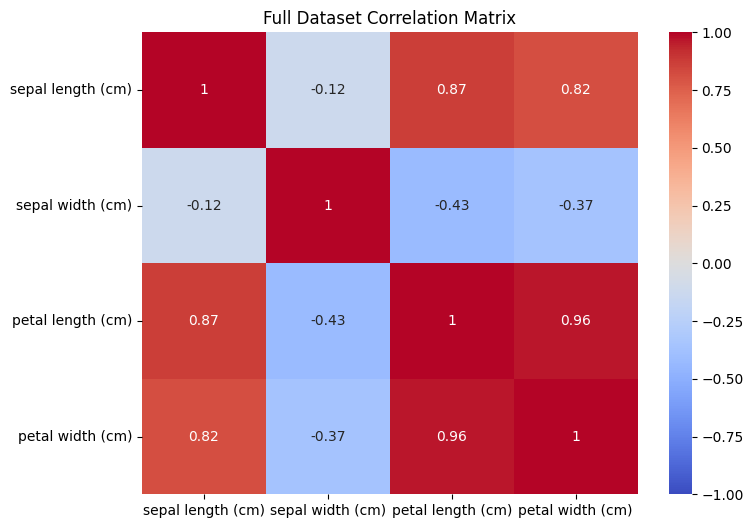

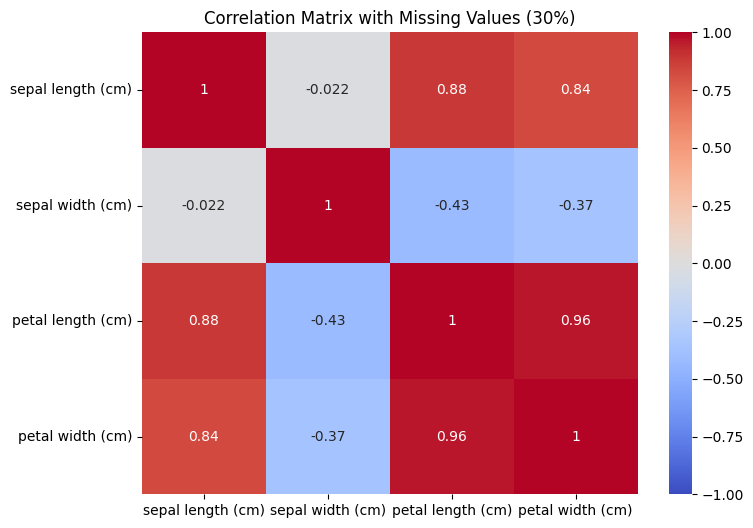

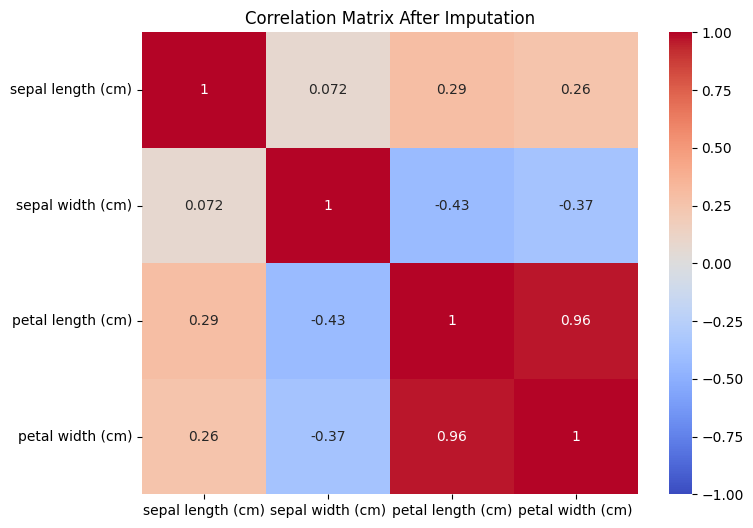

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
# create pandas dataframe from sklearn dataset object
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# This function plot corr heat map, helps simplify heatmap process that we will do multiple times
def plot_heatmap(dataframe, title):
    plt.figure(figsize=(8, 6))
    # Note calc corr like this excludes missing values 
    sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title)
    # plt.show()

# Corr heatmap of unaltered data 
plot_heatmap(df, "Full Dataset Correlation Matrix")

# This func introduce MCAR missingness in a given col and given rate
def introduce_missingness_in_column(dataframe, column, missing_rate=0.3):
    df_missing = dataframe.copy()
    # multiple things happening:
    # 1. create df_missing.shape[0] number of random floats between 0 and 1, these are row indices 
    # 2. if random float is less than missing rate assign True
    mask = np.random.rand(df_missing.shape[0]) < missing_rate
    # where row index is True and col make NaN
    df_missing.loc[mask, column] = np.nan
    return df_missing

# Adjust col name and missing rate to compare how it changes corr structure
df_missing = introduce_missingness_in_column(df, 'sepal length (cm)', missing_rate=0.5)

# heatmap with missing values
plot_heatmap(df_missing, "Correlation Matrix with Missing Values (30%)")

# calc mean and var of col with missing_rate data as NaN
mean_val = df_missing['sepal length (cm)'].mean()
std_val = df_missing['sepal length (cm)'].std()

# impute missing values using randn (Poor Man's EM)
# Let's make a copy to preserve df_missing for inspection
df_imputed = df_missing.copy()
missing_indices = df_imputed['sepal length (cm)'].isna()
# sample miss_indices number of times from a random normal distribution with mean of 0 and std dev of 1
# then multiply by observed std_dev to scale and add back in mean 
df_imputed.loc[missing_indices, 'sepal length (cm)'] = np.random.randn(missing_indices.sum()) * std_val + mean_val

# heatmap after imputation
plot_heatmap(df_imputed, "Correlation Matrix After Imputation")

In [18]:
# print out np random rand result
np.random.rand(df_missing.shape[0])
np.random.randn(missing_indices.sum())

array([-0.38013097, -0.60095794,  0.72154285,  2.32331114, -0.17008289,
       -0.91782121, -1.28061727, -1.9739877 , -0.44132669,  0.06583986,
        0.09980802,  1.07765145,  1.81609188,  0.12493019, -0.35495761,
        0.61959373, -0.07743248,  0.10515232,  0.49653014,  1.06824961,
       -0.98768409, -0.4355986 , -0.37411142, -1.48009494, -1.04588154,
        0.62714361,  0.09509196,  0.38146211, -0.46526549,  0.06833755,
       -0.38224697,  0.04350383,  1.58182171,  0.58917966, -0.25341018,
       -0.7460534 ,  0.18534715,  0.16296255, -0.15416803,  1.75760558,
        2.50675446,  0.50506136, -0.95694076, -0.13739751,  1.24160349,
        0.14082674, -0.34405726,  0.08399051,  0.08831096, -0.27414022,
        0.55683152, -0.39113567, -0.17351798,  0.13547692, -1.35156627,
        0.1757865 ,  0.95087861, -0.52903827,  0.23848704, -0.50591175,
        0.31233371, -0.79222862,  1.21840258, -0.45316623,  0.70165005,
        0.19867032,  1.03546557, -0.47918762,  1.12718694,  0.21

## Lessons learned:
 - **I introduced MCAR in sepal length and in petal length. Sepal length is more of a normal distribution than petal length. This strategy of imputation assumes our variable is normally distributed because we sample from a normal distribution during imputation so it may not be appropriate for petal length. However both traits correlation structure seemed to be affected in general the same way. That is to say that in general higher the missing rate the more different correlation structures become after imputation. The main change seems to be that strong correlation tended to decrease instead of spurious relationships appearing randomly. If true that imputation tends to break correlations rather than create new ones than it might have implications in your researching depending on which types of errors you are willing to accept. This technique of imputation does not include any knowledge about possible correlations when new values are generated, only the mean and std dev. For these reasons it makes more sense to jsut drop the data when MCAR.**

<div style="width: 100%; max-width: 100%; background-color: #fefefe; border: 1px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h3 style="color: #18453B; text-align: center;">Problem 2: Correlations and MAR Missingness</h3>
  
  <p style="color: #34495e; line-height: 1.6;">
    Next, we will do the same set of steps as in the previous problem, but now for MAR. To make this easy, you will use almost everything you just did in the previous problem. That is, use the iris dataset, make correlation heatmaps, and so on. The difference is that you will not create the missing values radnomly but according to some pattern in another column. 
  </p>
  
  <ul style="color: #34495e; line-height: 1.6;">
    <li>Copy your code from problem 1 to here and get ready to modify it.</li>
    <li>Pick a column to add missing values to.</li>
    <li>Add the missing values, `np.nan`, to the column based on values in one of the other columns. You can do this however you want, but an easy way to start is by creating missing values when the value in another column is above a certain value.</li>
    <li>Again, compare correlation heatmaps for a few choices (e,g,m columns, missingness rules, etc.).</li>
    <li>How did the correlation heatmap change for this MAR case compared with the MCAR case? 
    <li>In a markdown cell, summarize what you learned and what advice you would give to your future self when you are working on data science projects.</li>
  </ul>

  Yes, I will give you some background and code to start with! AS always, comment it if you use any of it.
  
  <!-- <div style="background-color: #6FC276; color: white; padding: 10px; margin-top: 20px; text-align: center; border-radius: 5px;">
    <strong>Tip:</strong> Plan carefully!
  </div> -->
</div>

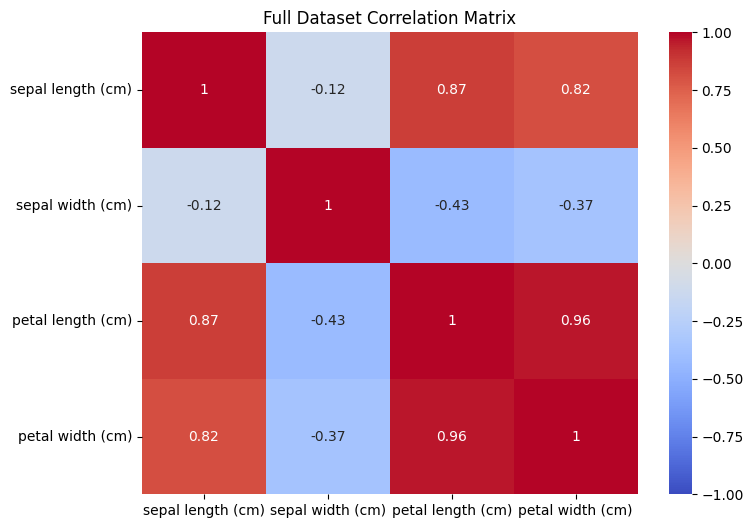

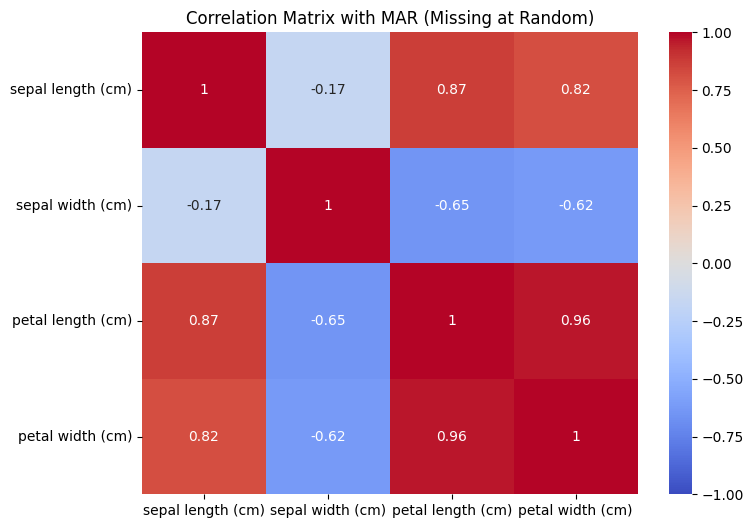

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

def plot_heatmap(dataframe, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

plot_heatmap(df, "Full Dataset Correlation Matrix")

# MAR: Make 'sepal width' missing based on 'petal length'
def introduce_MAR(dataframe, column_to_remove, reference_column, threshold):
    df_mar = dataframe.copy()
    
    # 'petal length' is above the threshold
    mask = df_mar[reference_column] > threshold
    
    # add missing values in 'sepal width' where 'petal length' is above the threshold
    df_mar.loc[mask, column_to_remove] = np.nan
    return df_mar

# set 'sepal length' to NaN if 'petal length' above 4.5
df_mar = introduce_MAR(df, 'sepal width (cm)', 'petal length (cm)', threshold=4.5)
# heatmap with MAR
plot_heatmap(df_mar, "Correlation Matrix with MAR (Missing at Random)")

## Lessons Learned:
 - **One thing I noticed between MCAR and MAR missingness is that the corr structure of missing data was the same as full dataset for MCAR but for MAR it changes. What this tells me is that the correlation between variables depends on the values because missing values were generated based on the value in another column for MAR. I think this illustrates why MCAR missingness is better than MAR because MAR can hide some of the patterns that exist between variables while MCAR should not really affect patterns as long as the sample size is large enough.**

<div style="width: 100%; max-width: 100%; background-color: #fefefe; border: 1px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h3 style="color: #18453B; text-align: center;">Problem 3: MAR Test</h3>
  
  <p style="color: #34495e; line-height: 1.6;">
    Yet again, you will use the same codes from above. In problem 2 you explored MAR bit didn't actually perform a test. Let's create MAR data and create a test. As mentioned in the lecture, we can do this by creating an "indicator" variable. (This was the variable "R" in the missingness diagrams.) Again, we'll do this in a simple way so that you truly see it. In the real world you would use a machine learning classifier for this, but that isn't necessary to understand the MAR test itself. 
  </p>
  
  <ul style="color: #34495e; line-height: 1.6;">
    <li>Copy the MAR code over.</li>
    <li>Add a column to the dataframe that is either 0, not missing, or 1, missing.</li>
    <li>To test for MAR, we need to see if those 0's and 1's are correalted with values in one of the other columns.</li>
    <li>Perform that test. (Do this however you wish; it is you who needs to be convinced.)</li>
    <li>Describe what you see. Keep in mind that you used known correlations to create the MAR version of the dataset in the first place, so your test should be quite clear.</li>
  </ul>

  I will give you some background and code to start with! Don't look at it unless you plan to completely comment it! 
  
  <!-- <div style="background-color: #6FC276; color: white; padding: 10px; margin-top: 20px; text-align: center; border-radius: 5px;">
    <strong>Tip:</strong> Plan carefully!
  </div> -->
</div>

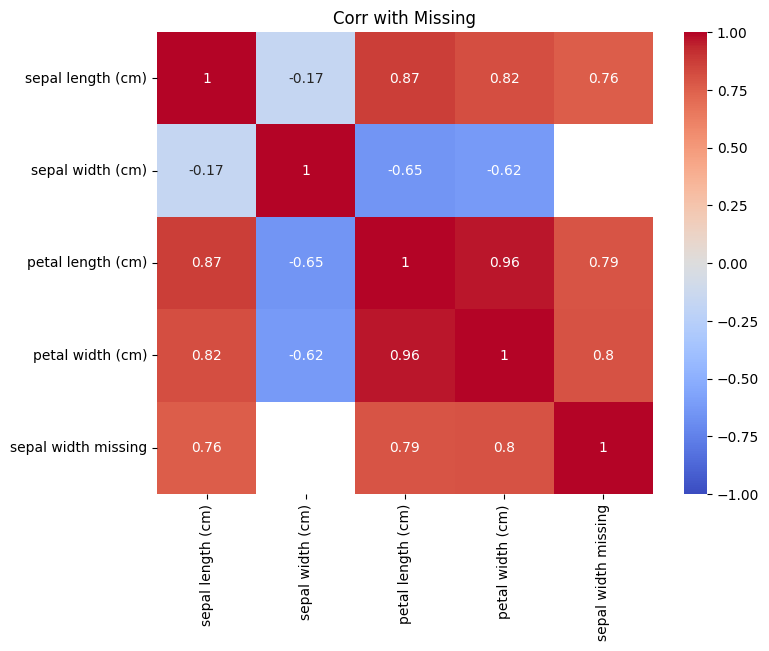

Correlation between 'sepal width missing' and 'petal length': 0.792
P-value: 0.000


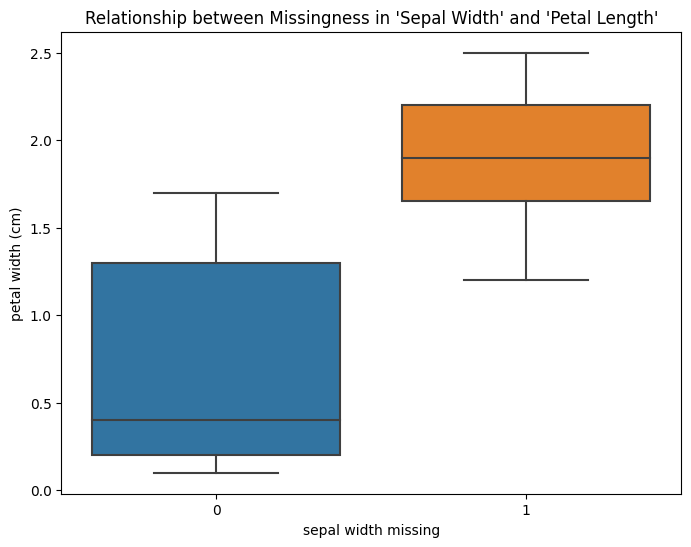

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.stats import pearsonr

# Load the Iris dataset same as above
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# heat map function to help visualize missing corr with other variables
def plot_heatmap(dataframe, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

# 1. Introduce MAR: Make 'sepal width' missing based on 'petal length'
def introduce_MAR(dataframe, column_to_remove, reference_column, threshold):
    df_mar = dataframe.copy()
    
    # Rows where 'petal length' is above the threshold
    mask = df_mar[reference_column] > threshold
    
    # Introduce missing values in 'sepal width' where 'petal length' is above the threshold
    df_mar.loc[mask, column_to_remove] = np.nan
    return df_mar

# Set 'petal length' threshold for MAR
df_mar = introduce_MAR(df, column_to_remove = 'sepal width (cm)',
                       reference_column = 'petal length (cm)', threshold=4.5)

# 2. Add an indicator column for missingness in 'sepal width'
# True and False evaluate to 1 and 0 respectively as type int
df_mar['sepal width missing'] = df_mar['sepal width (cm)'].isna().astype(int)

# 3. Check for correlation between 'sepal width missing' and 'petal length'
# person r returns two objects
correlation, p_value = pearsonr(df_mar['sepal width missing'], df_mar['petal length (cm)'])

# 4. Look at missingness with other values
plot_heatmap(df_mar, 'Corr with Missing')

print(f"Correlation between 'sepal width missing' and 'petal length': {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

# Visualize the relationship
plt.figure(figsize=(8, 6))
# make a box plot of petal width bc it has higher corr with missingness - we see some overlap
sns.boxplot(x='sepal width missing', y='petal width (cm)', data=df_mar)
plt.title("Relationship between Missingness in 'Sepal Width' and 'Petal Length'")
plt.show()

## Lessons Learned:
 - **It is indeed quite obvious that sepal width missing status is highly assocaited with petal length. For one there is a correlation coeffecient of 0.79 between the two variables indicating a very strong positive relationship indicating that as petal length increases, septal width is likely to be missing. The box plot makes this really obvious because as soon as petal length exceeds 4.5 sepal width missing is set to 1. What I think is more interesting is that sepal width missing is also highly correlated with sepal length and petal width. I think this happens because all of the data is correlated with each other. I think the box plot method provides a more clear answer about what column is driving MAR.**

<div style="width: 100%; max-width: 100%; background-color: #fefefe; border: 1px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h3 style="color: #18453B; text-align: center;">Projects</h3>
  
  <p style="color: #34495e; line-height: 1.6;">
    Use all of your extra time to work on your project. Your project is due at midnight, October 19. Here are some thoughts to keep in mind:
  </p>
  
  <ul style="color: #34495e; line-height: 1.6;">
    <li>All of your projects will be quite different from each other.</li>
    <li>It is important that there is a point, a goal.</li>
    <li>If things don't work out, you can change your project for the final; this of this first project as a practice project.</li>
    <li>The main goal of the midterm project is to ensure you are using all of the technqiues we have learned so far, which means there will be a lot more to do for the final project. Your project may not feel "done" at this stage.</li>
    <li>Go through the lectures to remind your self of what you should be thinking about: scaling, transforming, encoding, imputing, developing a narrative, visualization, Streamlit web apps, and so on.....</li>
    <li>Use as many of these techniques as you can, provided they are relevant to your goals. (As I wrote, all projects are different.... But, there are some basics everyone will have: a basic working web app, well crafted visualizations, a dataset that is properly ready to do something, and some initial results.</li>
    <li>It is best to think of the projects as something you are doing for work, not a class. Don't write it to you, don't write it to me and don't write it to Max. Picture this as something that would be deployed into the real world to someone you have never met. 
  </ul>

  
  <!-- <div style="background-color: #6FC276; color: white; padding: 10px; margin-top: 20px; text-align: center; border-radius: 5px;">
    <strong>Tip:</strong> Plan carefully!
  </div> -->
</div>